In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp
import scipy.stats


In [3]:
datapath = "~/teigen_data/output_rows.csv"

In [4]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [5]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())
df

# df

Index([u'appearance aposteriori_measurement',
       u'appearance aposteriori_measurement_multiplier',
       u'appearance measurement_multiplier', u'appearance noise_preview',
       u'appearance show_aposteriori_surface', u'appearance show_surface',
       u'appearance skip_volume_generation', u'appearance surface_measurement',
       u'area volume [mm^3]', u'areasampling areasize_mm', 
       ...
       u'postprocessing noise_preview',
       u'postprocessing noise_random_generator_seed',
       u'postprocessing noise_rng_seed', u'postprocessing output_dtype',
       u'postprocessing surface_measurement', u'required_teigen_version',
       u'surface [mm^2]', u'surface d. [mm^-1]', u'volume [mm^3]',
       u'volume d. []'],
      dtype='object', length=131)


,appearance aposteriori_measurement,appearance aposteriori_measurement_multiplier,appearance measurement_multiplier,appearance noise_preview,appearance show_aposteriori_surface,appearance show_surface,appearance skip_volume_generation,appearance surface_measurement,area volume [mm^3],areasampling areasize_mm,...,postprocessing noise_preview,postprocessing noise_random_generator_seed,postprocessing noise_rng_seed,postprocessing output_dtype,postprocessing surface_measurement,required_teigen_version,surface [mm^2],surface d. [mm^-1],volume [mm^3],volume d. []
0,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
1,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
2,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
3,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
4,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
5,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
6,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
7,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
8,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006
9,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,1716000,"[110, 120, 130]",...,False,0,NaN,uint8,False,0.2.17,19378.441193,0.011293,53205.891456,0.031006


# Numeric measurement precision (element_numer = 20, length_mean = 15)

,surface error [%],volume error [%],measurement_resolution
3,10.442908,27.833380,5
7,7.467474,19.885867,6
4,5.391109,14.759350,7
8,4.354917,11.376216,8
9,3.273553,8.756070,9
2,2.717594,7.338545,10
10,2.221115,6.071832,11
5,1.615226,4.417879,13
6,0.931055,2.464625,17
0,0.676889,1.882623,20


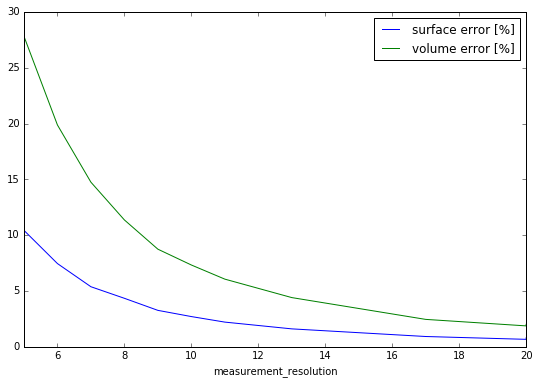

In [6]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected cylinders length_distribution_mean"] == 15
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort("measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

In [7]:
## element_number = 10, 

,surface error [%],volume error [%],measurement_resolution
17,10.352215,27.661293,5
23,7.281398,19.108472,6
18,5.323389,14.667218,7
24,4.287650,11.303706,8
19,3.280626,9.026255,9
11,2.164630,6.152171,11
20,1.593632,4.398056,13
21,0.937731,2.580117,17
16,0.665480,1.789696,20
22,0.433023,1.196441,25


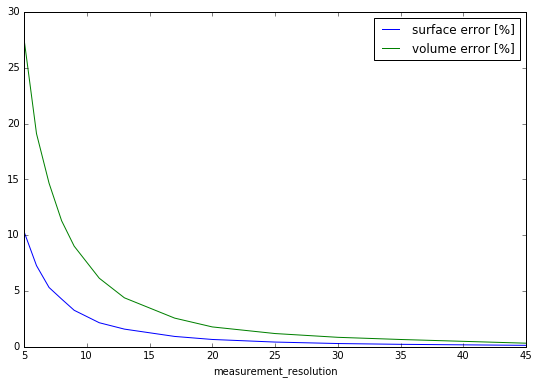

In [8]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected cylinders length_distribution_mean"] == 17
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort("measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

# Numeric and analytic error

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

## measurement_resolution = 20

In [9]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["element_number"] = df["generators Unconnected cylinders element_number"]
df["length_distribution_mean"] = df["generators Unconnected cylinders radius_distribution_mean"]
df["radius_distribution_mean"] = df["generators Unconnected cylinders length_distribution_mean"]
dfs = df[
    df["measurement_resolution"] == 20
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]", "element_number", "length_distribution_mean", "radius_distribution_mean"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%],element_number,length_distribution_mean,radius_distribution_mean
0,53205.891456,52204.225268,19378.441193,19247.270565,0.676889,1.882623,20,5,15
1,53205.891456,52204.225268,19378.441193,19247.270565,0.676889,1.882623,20,5,15
16,27097.787508,26612.819582,9979.153884,9912.744644,0.665480,1.789696,10,5,17
25,103616.834879,101748.794671,37762.707853,37537.039597,0.597596,1.802835,30,5,40
26,111754.078328,109741.340171,43253.466132,42998.821069,0.588728,1.801042,40,5,40
28,65674.996301,64497.632209,22397.574793,22266.526539,0.585100,1.792713,15,5,40
29,88224.852458,86635.300437,32151.614642,31960.195255,0.595365,1.801706,25,5,40
30,107615.287314,105676.138281,40264.535468,40025.118293,0.594611,1.801927,35,5,40
31,109360.937550,107449.471743,40257.780561,40031.125228,0.563010,1.747851,30,5,60
32,115202.868612,113204.722006,41376.688540,41141.187400,0.569164,1.734459,30,20,50


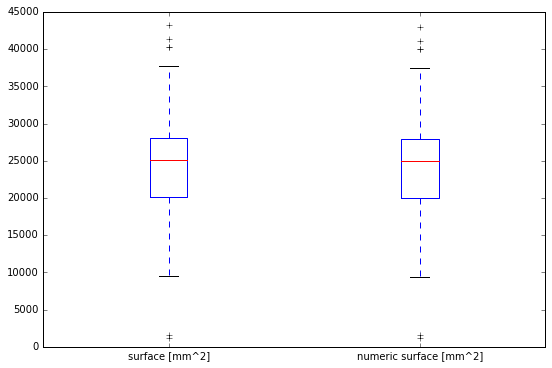

In [10]:

axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

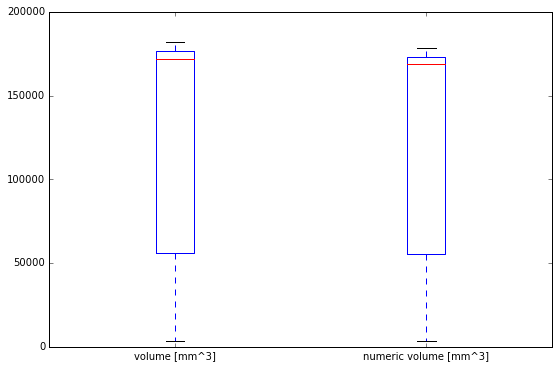

In [11]:
axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

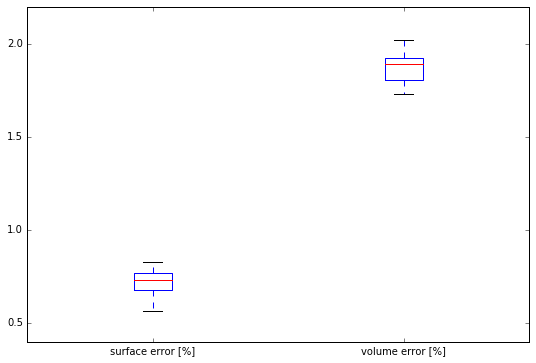

In [12]:
axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [13]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%],element_number,length_distribution_mean,radius_distribution_mean
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,127925.756300,125495.574406,24416.023162,24242.564992,0.712326,1.882198,19.326087,11.782609,27.021739
std,64183.232407,62935.968137,9336.394874,9277.282063,0.075706,0.075408,6.772672,6.299605,11.567174
min,3283.003191,3222.885597,1198.526645,1190.393023,0.563010,1.734459,10.000000,5.000000,10.000000
25%,56323.167667,55277.577004,20133.224593,20002.084558,0.676889,1.806189,15.000000,5.000000,20.250000
50%,172076.745695,168776.962297,25156.351156,24958.996340,0.733481,1.894181,18.000000,13.000000,26.500000
75%,176875.524710,173391.213642,28076.182672,27864.755539,0.770297,1.925101,20.000000,16.000000,34.500000
max,182127.930868,178621.784453,43253.466132,42998.821069,0.831531,2.020386,40.000000,25.000000,60.000000


# Statistics

## Surface

In [14]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfsp["surface [mm^2]"], y=dfsp["numeric surface [mm^2]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=3.3905915631067645e-09)

In [15]:
scipy.stats.wilcoxon(dfsp["surface error [%]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=3.3905915631067645e-09)

In [16]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfsp["surface [mm^2]"], dfsp["numeric surface [mm^2]"])

SpearmanrResult(correlation=0.99912891986062713, pvalue=2.3871761004510822e-62)

## Volume

In [17]:
# wilcoxon - čím větší, tím lepší
scipy.stats.wilcoxon(x=dfsp["volume [mm^3]"], y=dfsp["numeric volume [mm^3]"], correction=False, zero_method="pratt")

WilcoxonResult(statistic=0.0, pvalue=3.3905915631067645e-09)

In [18]:
# spearman čím menší, tím lepší
scipy.stats.spearmanr(dfsp["volume [mm^3]"], dfsp["numeric volume [mm^3]"])

SpearmanrResult(correlation=0.99813339970134396, pvalue=4.5226216053478292e-55)

In [24]:
resolution = 6
radius = 10

alpha = (2*np.pi) / (resolution)
radius_out = radius / np.cos(alpha/2)

radius_out


11.547005383792515

In [25]:
np.cos(np.pi/2)

6.123233995736766e-17